In [2]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import PIL

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [5]:
data=Dataset('sea_temp.nc')

In [6]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    title: Global SST & Sea Ice Anomaly, L4 OSTIA, 0.25 deg daily (METOFFICE-GLO-SST-L4-NRT-OBS-ANOM-V2)
    summary: A merged, multi-sensor L4 Foundation SST anomaly product
    references: Good S, Fiedler E, Mao C, Martin MJ, Maycock A, Reid R, Roberts-Jones J, Searle T, Waters J, While J, Worsfold M. The Current Configuration of the OSTIA System for Operational Production of Foundation Sea Surface Temperature and Ice Concentration Analyses. Remote Sensing. 2020; 12(4):720 https://doi.org/10.3390/rs12040720
    institution: UKMO
    history: Created from sst:temperature regridded with area avg. to grid of temperature on new grid. sst_anomaly from NODC/RSMAS AVHRR Pathfinder Verison 5.0 Climatology regridded with area avg.
    comment: WARNING Some applications are unable to properly handle signed byte values. If values are encountered > 127, please subtract 256 fro

In [9]:
data.variables.keys()

dict_keys(['sst_anomaly', 'lon', 'time', 'lat', 'analysed_sst'])

In [10]:
lats = data.variables['lat'][:]
lons = data.variables['lon'][:]
time = data.variables['time'][:]
sst_anomaly = data.variables['sst_anomaly'][:]
analysed_sst = data.variables['analysed_sst'][:]

In [17]:
temp=analysed_sst.data

In [147]:
type(analysed_sst)

numpy.ma.core.MaskedArray

In [117]:
mp = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)

In [119]:
lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)

In [118]:
data.variables['analysed_sst']

<class 'netCDF4._netCDF4.Variable'>
int16 analysed_sst(time, lat, lon)
    _FillValue: -32768
    add_offset: 273.15
    long_name: analysed sea surface temperature
    scale_factor: 0.01
    standard_name: sea_surface_foundation_temperature
    type: foundation
    units: kelvin
    source: UKMO-L4HRfnd-GLOB-OSTIA
    comment:  
unlimited dimensions: 
current shape = (8, 720, 1440)
filling on

In [126]:
days=np.arange(0,8)

In [127]:
days

array([0, 1, 2, 3, 4, 5, 6, 7])

C:\Users\gahat\AppData\Local\Temp\ipykernel_10560\3036790950.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  c_scheme = mp.pcolor(x, y, np.squeeze(analysed_sst[i,:,:]), cmap = 'jet')


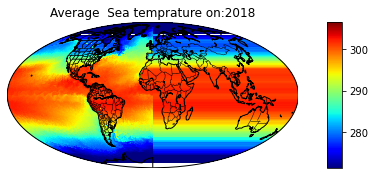

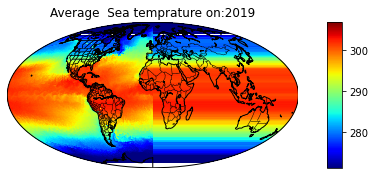

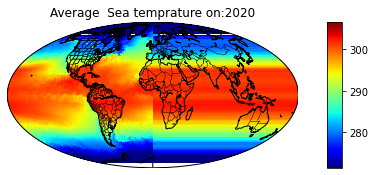

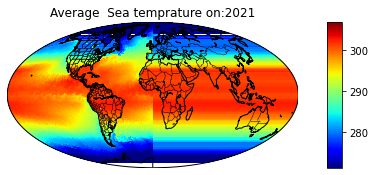

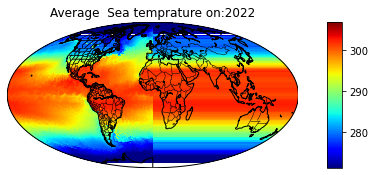

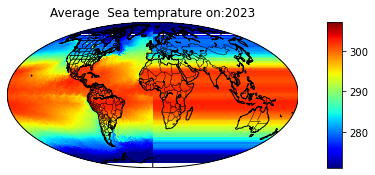

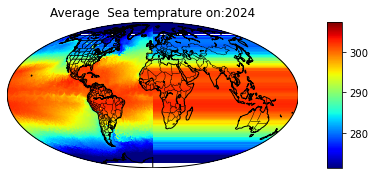

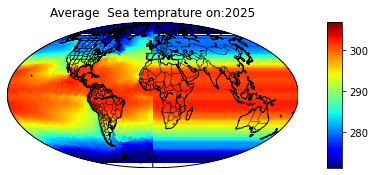

In [130]:
# for i in days:
#     c_scheme = mp.pcolor(x, y, np.squeeze(analysed_sst[i,:,:]), cmap = 'jet')
#     mp.drawcoastlines()
#     mp.drawstates()
#     mp.drawcountries()
#     day=i+1
#     cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')
#     dayz=i+2018
#     plt.title('Average  Sea temprature on:'+str(dayz))
#     plt.savefig(r'C:\Users\gahat\Desktop\Python Geopnadas\Netcdf file with python\NetCDF Sea Tempreture\jpegs'+'\\'+ str(day)+'.jpg')
#     plt.show()

In [131]:
analysed_sst

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [271.3500061035156, 271.3500061035156, 271.3500061035156, ...,
          271.3500061035156, 271.3500061035156, 271.3500061035156],
         [271.3500061035156, 271.3500061035156, 271.3500061035156, ...,
          271.3500061035156, 271.3500061035156, 271.3500061035156],
         [271.3500061035156, 271.3500061035156, 271.3500061035156, ...,
          271.3500061035156, 271.3500061035156, 271.3500061035156]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [271.3500061035156, 271.3500061035156, 271.3500061035156, ...,
          271.3500061035156, 271.3500061035156, 271.3500061035156],
         [271.3500061035156, 271.3500061035156, 271.3500061035156, ...,
          271.3500061035156, 271.3500061035156, 271.3500061035156],
         [271.35

In [146]:
type(data)

netCDF4._netCDF4.Dataset

In [148]:
import numpy.ma as ma

In [149]:
analysed_sst.mean()

286.91583606254574

In [151]:
df=pd.DataFrame(analysed_sst,columns = ['Column_A'])

ValueError: Must pass 2-d input. shape=(8, 720, 1440)